In [57]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from datetime import datetime, date
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Installing and importing seaborn

In [2]:
import seaborn as sns

In [60]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset= ['salary_year_avg'])

## Using seaborn for Bar Graphs

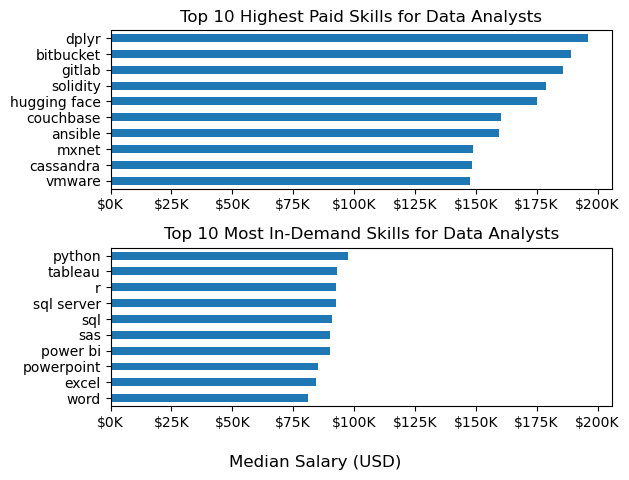

In [27]:
df_DA_US_exploded = df_DA_US.explode("job_skills")

skill_stats = df_DA_US_exploded.groupby(["job_skills"])['salary_year_avg'].agg(["count", "median"])


count_of_skills = 10

skills_in_demand = skill_stats.sort_values("count", ascending= False).head(count_of_skills).sort_values('median', ascending= False)
highest_paid_skills = skill_stats.sort_values("median", ascending= False).head(count_of_skills)


fig, ax = plt.subplots(2,1)
# fig.set_size_inches(8,5)

highest_paid_skills[::-1].plot(kind= "barh",
                               y= 'median',
                               ax= ax[0],
                               title= f"Top {count_of_skills} Highest Paid Skills for Data Analysts",
                               ylabel= "",
                               legend= False)
skills_in_demand.plot(kind= "barh",
                      y= 'median',
                      ax= ax[1],
                      title= f"Top {count_of_skills} Most In-Demand Skills for Data Analysts",
                      ylabel= "",
                      legend= False)

first_ax = ax[0]
second_ax = ax[1]

# first_ax.invert_yaxis()   # Solved above as - highest_paid_skills[::-1]
second_ax.invert_yaxis()

first_ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
second_ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

second_ax.set_xlim(first_ax.get_xlim())
fig.supxlabel("Median Salary (USD)")

fig.tight_layout()
plt.show()

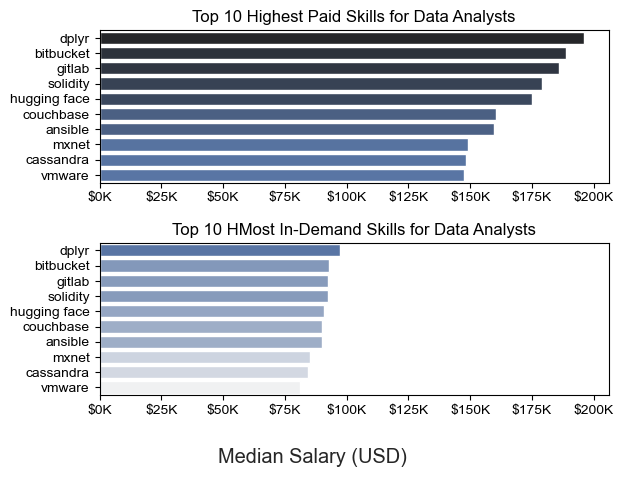

In [51]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style= 'ticks')

# highest_paid_skills[::-1].plot(kind= "barh",
#                                y= 'median',
#                                ax= ax[0],
#                                title= f"Top {count_of_skills} Highest Paid Skills for Data Analysts",
#                                ylabel= "",
#                                legend= False)

sns.barplot(data= highest_paid_skills, 
            x= 'median', 
            y= highest_paid_skills.index,
            ax= ax[0],
            hue= 'median',
            palette= 'dark:b_r') # Putting "_r" in front of a colour will reverse the colour order

sns.barplot(data= skills_in_demand, 
            x= 'median', 
            y= highest_paid_skills.index,
            ax= ax[1],
            hue= 'median',
            palette= 'light:b')

# skills_in_demand.plot(kind= "barh",
#                       y= 'median',
#                       ax= ax[1],
#                       title= f"Top {count_of_skills} Most In-Demand Skills for Data Analysts",
#                       ylabel= "",
#                       legend= False)

first_ax = ax[0]
second_ax = ax[1]

# first_ax.invert_yaxis()
# second_ax.invert_yaxis()

first_ax.set_title(f"Top {count_of_skills} Highest Paid Skills for Data Analysts")
second_ax.set_title(f"Top {count_of_skills} HMost In-Demand Skills for Data Analysts")

first_ax.legend().remove()
second_ax.legend().remove()

first_ax.set_xlabel('')
first_ax.set_ylabel('')
second_ax.set_xlabel('')
second_ax.set_ylabel('')

first_ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
second_ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

second_ax.set_xlim(first_ax.get_xlim())

fig.supxlabel("Median Salary (USD)")

fig.tight_layout()
plt.show()

## Using seaborn for Histogram


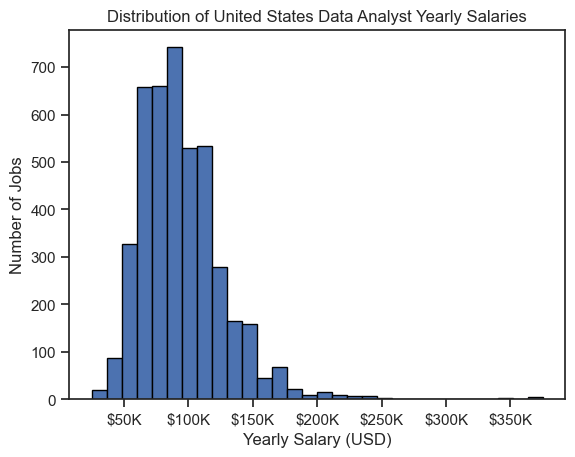

In [63]:
df_DA_US['salary_year_avg'].plot(kind = 'hist',
                                 bins = 30,
                                 edgecolor = 'black')

plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("Number of Jobs")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

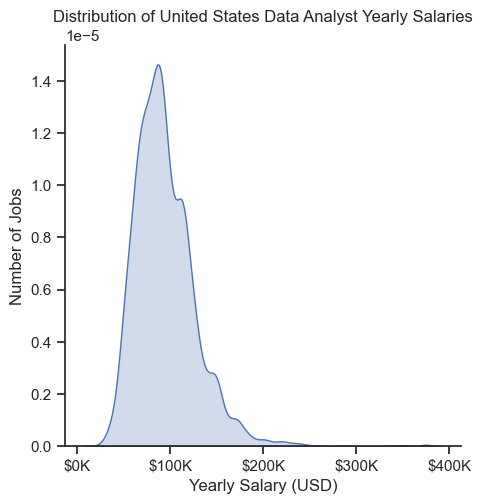

In [75]:
# df_DA_US['salary_year_avg'].plot(kind = 'hist',
#                                  bins = 30,
#                                  edgecolor = 'black')

sns.displot(df_DA_US['salary_year_avg'], kind= 'kde', fill= True) # displot = distribution plot

plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("Number of Jobs")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

## Using seaborn for boxplots

/var/folders/9n/s7pjshks0978pd3sp_7b8t0c0000gn/T/ipykernel_1635/2700799513.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels= job_titles, vert= False)


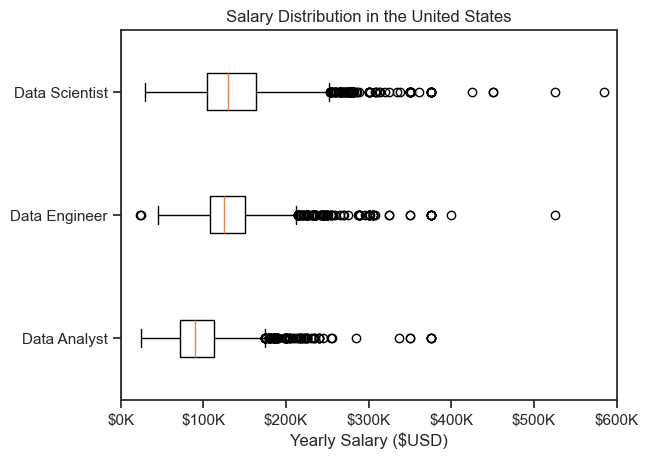

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the data to appropriate job_titles
# Only get data anayst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == "United States")].copy()

df_US = df_US.dropna(subset= ["salary_year_avg"])


job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


plt.boxplot(job_list, labels= job_titles, vert= False)
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax.axvline()
plt.xlim(0, 600000)


plt.show()

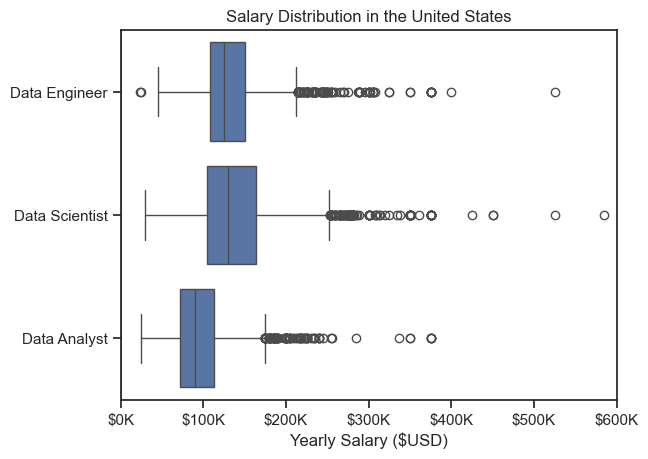

In [83]:
# plt.boxplot(job_list, labels= job_titles, vert= False)

sns.boxplot(data= df_US, x= 'salary_year_avg', y= 'job_title_short')

plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax.axvline()
plt.xlim(0, 600000)


plt.show()